# Jaynes Cummmings like model in the ultrastrong coupling regime

The Jaynes-Cummings model is a quantum mechanical model that describes the interaction between a two-level system (e.g. an atom) and a quantized field (e.g. a photon). 

------

In the ultrastrong coupling regime, the interaction between the two-level system and the field becomes so strong that the traditional rotating wave approximation (RWA) used in the Jaynes-Cummings model is no longer valid. In this regime, new physics emerge, such as the possibility of a dressed state, and the energy levels of the two-level system can become hybridized with the field modes.

------

 This leads to a more complex behavior and has important implications for various areas of physics and technology, including quantum information processing and quantum optics.

In [1]:
%pip install qutip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.7/16.7 MB 43.2 MB/s eta 0:00:00


In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# make qutip available
from qutip import *

## Introduction

In the Jaynes-Cumming model, the dipole-interaction term between the atom and the cavity field is assumed to be weak, so that a rotating-wave approximation can be performed. For large coupling strengths between the atom and the cavity field the RWA is not justified, and for very large coupling strength interesting properties of the atom-cavity ground state is observed.


----

Consider the Hamiltonian

$$ H = \hbar \omega_c a^\dagger a + \frac{1}{2}\hbar\omega_a\sigma_z + \hbar g(a^\dagger + a)(\sigma_- + \sigma_+) $$

Note that here we have not transformed the interaction part of the Hamiltonina using the RWA, for which the Hamiltonian would have been

$$ H_{\rm RWA} = \hbar \omega_c a^\dagger a + \frac{1}{2}\hbar\omega_a\sigma_z + \hbar g(a^\dagger\sigma_- + a\sigma_+) $$


-------


In this notebook we will calculate the ground state of the Hamitonian $H$ as a function of the interaction strength $g$.



------

The regime $g$ is large compared with all other energy scales in the Hamiltonian $H$ is called the ultrastrong soupling regime.

## Problem Parameters 

Here we use units where $\hbar = 1$

In [5]:
wc = 1.0  * 2 * np.pi  # cavity frequency
wa = 1.0  * 2 * np.pi  # atom frequency

N = 15              # number of cavity fock states
use_rwa = False
     

## Setup the operators and the Hamiltonian

In [6]:
# operators
a  = tensor(destroy(N), qeye(2))
sm = tensor(qeye(N), destroy(2))

na = sm.dag() * sm  # atom
nc = a.dag() * a    # cavity

# decoupled Hamiltonian
H0 = wc * a.dag() * a + wa * sm.dag() * sm

# interaction Hamiltonian
if use_rwa:
    H1 = (a.dag() * sm + a * sm.dag())
else:
    H1 = (a.dag() + a) * (sm + sm.dag())

## Find ground state as a function of coupling strength

In [7]:
g_vec = np.linspace(0, 2.0, 101) * 2 * np.pi # coupling strength vector

psi_list = []

for g in g_vec:

    H = H0 + g * H1

    # find the groundstate and its energy
    gnd_energy, gnd_state = H.groundstate()
    
    # store the ground state
    psi_list.append(gnd_state)

Calculate the cavity and atom excitation probabilities as for the calculated ground states:

In [8]:
na_expt = expect(na, psi_list) # qubit  occupation probability
nc_expt = expect(nc, psi_list) # cavity occupation probability

Plot the ground state occupation probabilities of the cavity and the atom as a function of coupling strenght. Note that for large coupling strength (the ultrastrong coupling regime, where $g > \omega_a \omega_c$
), the ground state has both photonic and atomic excitations

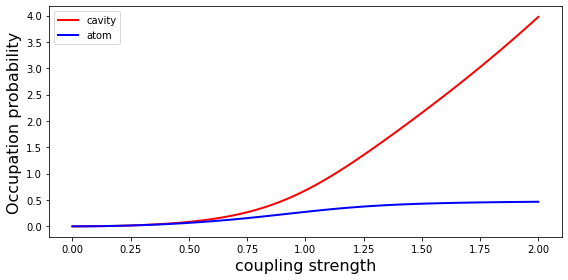

In [11]:
fig, axes = plt.subplots(1, 1, sharex=True, figsize=(8,4))

axes.plot(g_vec/(2*np.pi), nc_expt, 'r', linewidth=2, label="cavity")
axes.plot(g_vec/(2*np.pi), na_expt, 'b', linewidth=2, label="atom")
axes.set_ylabel("Occupation probability", fontsize=16)
axes.set_xlabel("coupling strength", fontsize=16)
axes.legend(loc=0)

fig.tight_layout()

## Plot the wigner functions of the cavity as a function of coupling strength

In [17]:
import matplotlib

Text(0, 0.5, 'Occupation probability')

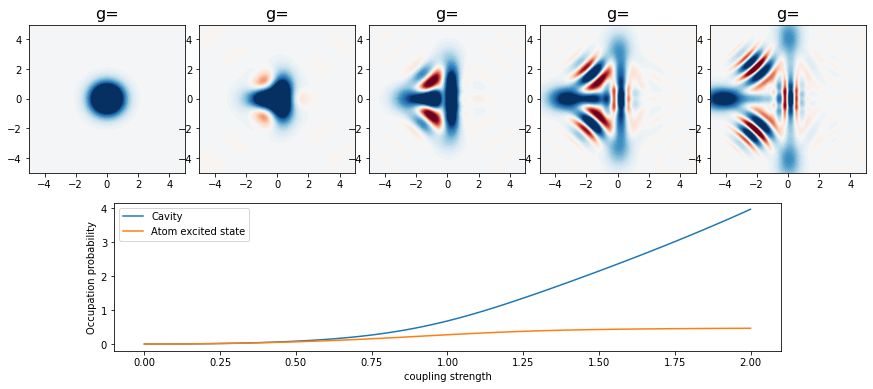

In [19]:
g_idx = np.where([g_vec == 2*np.pi*g for g in [0.0, 0.5, 1.0, 1.5, 2.0]])[1]
psi_sublist = np.array(psi_list)[g_idx]

xvec = np.linspace(-5,5,200)

fig_grid = (2, len(psi_sublist)*2)
fig = plt.figure(figsize=(3*len(psi_sublist),6))

for idx, psi in enumerate(psi_sublist):
    rho_cavity = ptrace(Qobj(psi), 0)
    W = wigner(rho_cavity, xvec, xvec)
    ax = plt.subplot2grid(fig_grid, (0, 2*idx), colspan=2)
    ax.contourf(xvec, xvec, W, 100, norm=matplotlib.colors.Normalize(-.125,.125), cmap=plt.get_cmap('RdBu'))
    ax.set_title(r"g=" % (g_vec[g_idx][idx]/(2*np.pi)), fontsize=16)

# plot the cavity occupation probability in the ground state
ax = plt.subplot2grid(fig_grid, (1, 1), colspan=(fig_grid[1]-2))
ax.plot(g_vec/(2*np.pi), nc_expt, label="Cavity")
ax.plot(g_vec/(2*np.pi), na_expt, label="Atom excited state")
ax.legend(loc=0)
ax.set_xlabel('coupling strength')
ax.set_ylabel('Occupation probability')

## Entropy of atom/cavity as a measure of entanglement

In [21]:
entropy_cavity = np.zeros(shape(g_vec))
entropy_atom   = np.zeros(shape(g_vec))

for idx, psi in enumerate(psi_list):
    
    rho_cavity = ptrace(psi, 0)
    entropy_cavity[idx] = entropy_vn(rho_cavity, 2)

    rho_atom = ptrace(psi, 1)
    entropy_atom[idx]   = entropy_vn(rho_atom, 2)

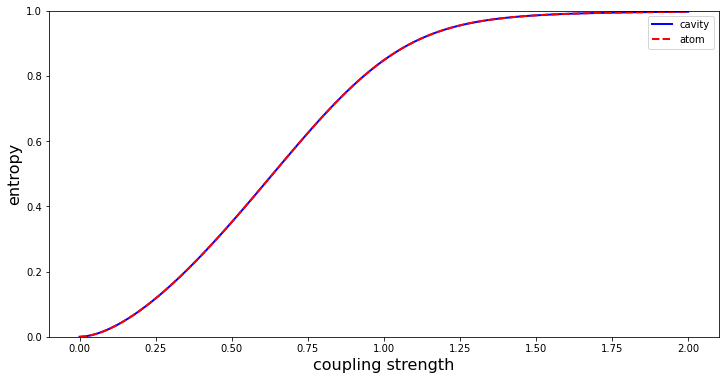

In [22]:
fig, axes = plt.subplots(1, 1, figsize=(12,6))
axes.plot(g_vec/(2*np.pi), entropy_cavity, 'b', label="cavity", linewidth=2)
axes.plot(g_vec/(2*np.pi), entropy_atom, 'r--', label="atom", linewidth=2)
axes.set_ylim(0,1)
axes.set_ylabel("entropy", fontsize=16)
axes.set_xlabel("coupling strength", fontsize=16)
axes.legend(loc=0)

## Dynamics of an initially excited cavity

In [23]:
H = H0 + 1.0 * 2 * np.pi * H1

psi0 = tensor(basis(N,1), basis(2,0))

In [24]:
tlist = np.linspace(0, 20, 1000)
output = mesolve(H, psi0, tlist, [], [a.dag() * a, sm.dag() * sm])

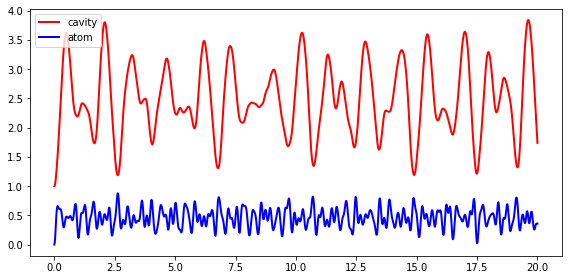

In [26]:
fig, axes = plt.subplots(1, 1, sharex=True, figsize=(8,4))

axes.plot(tlist, np.real(output.expect[0]), 'r', linewidth=2, label="cavity")
axes.plot(tlist, np.real(output.expect[1]), 'b', linewidth=2, label="atom")
axes.legend(loc=0)

fig.tight_layout()

## Fock-state distribution and Wigner function for the cavity as a function of time

In [27]:
tlist = np.linspace(0, 0.35, 8)
output = mesolve(H, psi0, tlist, [], [])

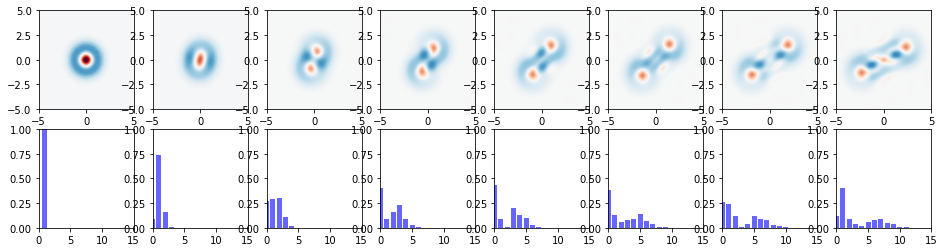

In [29]:
rho_ss_sublist = output.states #[::4]

xvec = np.linspace(-5,5,200)

fig, axes = plt.subplots(2, len(rho_ss_sublist), figsize=(2*len(rho_ss_sublist), 4))

for idx, rho_ss in enumerate(rho_ss_sublist):

    # trace out the cavity density matrix
    rho_ss_cavity = ptrace(rho_ss, 0)
    
    # calculate its wigner function
    W = wigner(rho_ss_cavity, xvec, xvec)
    
    # plot its wigner function
    axes[0,idx].contourf(xvec, xvec, W, 100, norm=matplotlib.colors.Normalize(-.25,.25), 
                         cmap=plt.get_cmap('RdBu'))

    # plot its fock-state distribution
    axes[1,idx].bar(np.arange(0, N), np.real(rho_ss_cavity.diag()), color="blue", alpha=0.6)
    axes[1,idx].set_ylim(0, 1)
    axes[1,idx].set_xlim(0, N)

## Same thing with a little bit of dissipation

In [30]:
kappa = 0.25

In [31]:
tlist = np.linspace(0, 20, 1000)
output = mesolve(H, psi0, tlist, [np.sqrt(kappa) * a], [a.dag() * a, sm.dag() * sm])
     



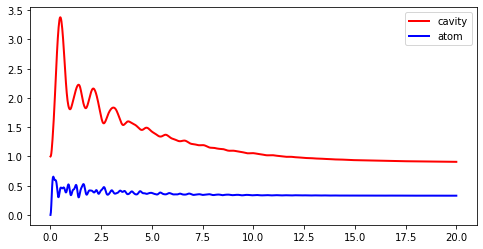

In [32]:
fig, axes = plt.subplots(1, 1, sharex=True, figsize=(8,4))
axes.plot(tlist, output.expect[0], 'r', linewidth=2, label="cavity")
axes.plot(tlist, output.expect[1], 'b', linewidth=2, label="atom")
axes.legend(loc=0)
     

In [34]:
tlist = np.linspace(0, 10, 8)
output = mesolve(H, psi0, tlist, [np.sqrt(kappa) * a], [])

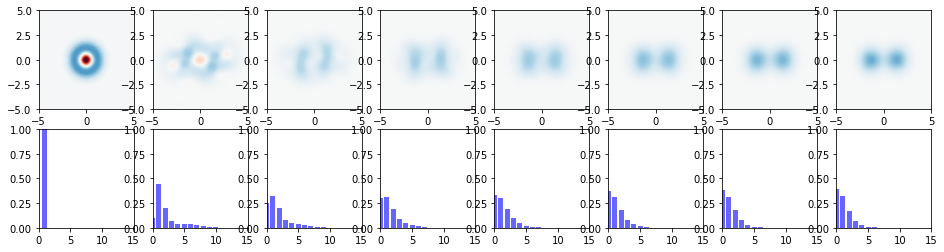

In [35]:
xvec = np.linspace(-5,5,200)

fig, axes = plt.subplots(2, len(output.states), figsize=(2*len(output.states), 4))

for idx, rho_ss in enumerate(output.states):

    # trace out the cavity density matrix
    rho_ss_cavity = ptrace(rho_ss, 0)
    
    # calculate its wigner function
    W = wigner(rho_ss_cavity, xvec, xvec)
    
    # plot its wigner function
    axes[0,idx].contourf(xvec, xvec, W, 100, 
                         norm=matplotlib.colors.Normalize(-.25,.25), cmap=plt.get_cmap('RdBu'))

    # plot its fock-state distribution
    axes[1,idx].bar(np.arange(0, N), np.real(rho_ss_cavity.diag()), color="blue", alpha=0.6)
    axes[1,idx].set_ylim(0, 1)
    axes[1,idx].set_xlim(0, N)

## Entropy as a function of time in presence of dissipation and starting in the ideal ground state

In [36]:
tlist = np.linspace(0, 30, 50)

psi0 = H.groundstate()[1]

output = mesolve(H, psi0, tlist, [np.sqrt(kappa) * a], [])
     

In [37]:
entropy_tot    = np.zeros(shape(tlist))
entropy_cavity = np.zeros(shape(tlist))
entropy_atom   = np.zeros(shape(tlist))

for idx, rho in enumerate(output.states):
    
    entropy_tot[idx] = entropy_vn(rho, 2)    
    
    rho_cavity = ptrace(rho, 0)
    entropy_cavity[idx] = entropy_vn(rho_cavity, 2)

    rho_atom = ptrace(rho, 1)
    entropy_atom[idx]   = entropy_vn(rho_atom, 2)

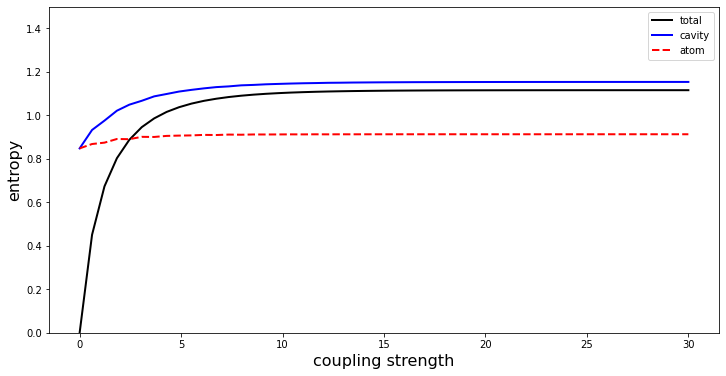

In [38]:
fig, axes = plt.subplots(1, 1, figsize=(12,6))
axes.plot(tlist, entropy_tot, 'k', label="total", linewidth=2)
axes.plot(tlist, entropy_cavity, 'b', label="cavity", linewidth=2)
axes.plot(tlist, entropy_atom, 'r--', label="atom", linewidth=2)
axes.set_ylabel("entropy", fontsize=16)
axes.set_xlabel("coupling strength", fontsize=16)
axes.set_ylim(0, 1.5)
axes.legend(loc=0)

## Software Versions

In [39]:
from qutip.ipynbtools import version_table

version_table()

Software,Version
QuTiP,4.7.1
Numpy,1.21.6
SciPy,1.7.3
matplotlib,3.2.2
Cython,0.29.33
Number of CPUs,2
BLAS Info,OPENBLAS
IPython,7.9.0
Python,"3.8.10 (default, Nov 14 2022, 12:59:47) [GCC 9.4.0]"
OS,posix [linux]
